In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot as w
import re
#from io import StringIO
#print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'

In [14]:
from wand.image import Image as WImage
def plplot_show(filename):
    img = WImage(filename=filename)
    img.resize(400,300)
    img

def header_columns(filename,column):
    COMMENT_CHAR = '#'
    col_NAME = []
    with open(filename, 'r') as td:
        for line in td:
            if line[0] == COMMENT_CHAR:
                info = re.split(' +', line.rstrip('\n'))
                col_NAME.append(info[column])
    return col_NAME

In [15]:
get_proc_file="get_proc_elines_MaNGA.no_nan.csv"
col_NAME=header_columns(get_proc_file,2)
dataframe = pd.read_csv(get_proc_file,comment="#",names=col_NAME,sep=',',index_col=False)

In [16]:
get_proc_file_ind="get_proc_indices_MaNGA.csv"
col_NAMES_ind=header_columns(get_proc_file_ind,2)
df_ind = pd.read_csv(get_proc_file_ind,comment="#",names=col_NAMES_ind,sep=',',index_col=False)
#print(df_ind.head(3))

In [17]:
df_join = pd.merge(dataframe,df_ind, on='name')
print(df_join.head(3))

        MaNGA_name_x  nsa_redshift_x  nsa_u_absmag_x  nsa_z_absmag_x  \
0  manga-10001-12701        0.039207        -17.7885        -19.5112   
1  manga-10001-12702        0.040811        -17.2297        -19.6569   
2  manga-10001-12703        0.046209        -17.9056        -20.5965   

   nsa_u_z_absmag_x  nsa_mstar_x  nsa_inclination_x  nsa_petro_th50_x  \
0            1.7227     9.784340          66.445216           5.16633   
1            2.4272    10.025159          53.927051           7.01311   
2            2.6909    10.433998          69.021401           6.52300   

   nsa_sersic_ba_x  nsa_sersic_n_x  ...  slope_D4000  e_slope_D4000  \
0         0.335333        0.741845  ...    -0.043259       0.008662   
1         0.508217        1.442720  ...    -0.150406       0.014284   
2         0.205749        2.180840  ...    -0.167760       0.006433   

  D4000_OH_fit  e_D4000_fit.1  slope_D4000_OH  e_slope_D4000_OH  Sgas_OH_fit  \
0     8.362830       0.104904        0.009609        

In [18]:
# Join plot!

(0, 2.5)

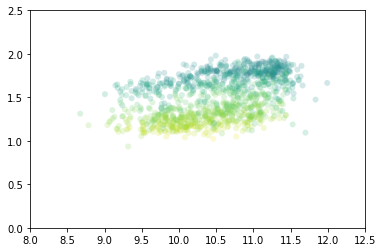

In [19]:
x=df_join['log_Mass_no_corr']
y=df_join['lSFR']
d=df_join['D4000_Re_fit']
c=df_join['EW_Ha_ALL']
x.to_numpy(dtype='float')
y.to_numpy(dtype='float')
d.to_numpy(dtype='float')
c.to_numpy(dtype='float')

mask_finite=np.isfinite(d) #,c_n,d_n)
#print (x_n[mask_finite],d_n[mask_finite])
log_c=np.log10(np.abs(c[mask_finite]))
fig, axes = plt.subplots()
axes.scatter(x[mask_finite], d[mask_finite], c=log_c, vmin=-3,vmax=2,alpha=0.2,edgecolor='none')
axes.set_xlim([8,12.5])
axes.set_ylim([0,2.5])


In [20]:
print(x.values)

[10.10899603 10.10465843 10.53945449 ... 11.33885959 10.62455316
  9.89422651]


In [ ]:
#
# Now using plplot
#
def cmap1_init(w):
    i = [0, 1]
    h = [240, 0]
    l = [0.6, 0.6]
    s = [0.8, 0.8]
    a = [0.05,0.3]
    rev = [0, 0]
    w.plscmap1n(256)
    w.plscmap1la(0, i, h, l, s,a, rev )


#import plplot as w
plot_file="plplot_MaNGA.pdf"
pldev_name="pdfqt"
xx=np.array(x.values)
yy=np.array(y.values)
w.plsdev(pldev_name)
w.plsfnam(plot_file)
xp1 = 100.
yp1 = 100.
xleng1 = 800
yleng1 = 600
xoff1 = 10
yoff1 = 20
w.plspage(xp1, yp1, xleng1, yleng1, xoff1, yoff1)
w.plscolbga(255,255,255,1)
w.plinit()
cmap1_init(w)
w.plseed(5489)
w.plscol0(0,0,0,0)
w.plcol0(0)
w.plenv(8.0,12.5,-6.0,2.0,0,0)
w.pllab('log M*','log SFR','')
#w.plcol0(5)
#w.plpoin(x,y,9)
n_size=xx.size
print(n_size)
x_val=zeros(1)
y_val=zeros(1)
#for i in range(n_size):
for i in range(n_size):
#    print(i,xx[i],yy[i])
    w.plcol1((log_c[i]+3)/(5))
    x_val[0]=xx[i]
    y_val[0]=yy[i]
    w.plstring(x_val, y_val, "#(728)")
#    w.plstring(xx, yy, "#(728)")
w.plcol0(3)
w.plend1()
#plplot_show(plot_file)


In [1]:
#plplot_show(plot_file)

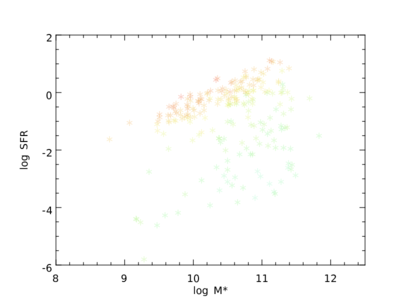

In [2]:
from wand.image import Image as WImage
img = WImage(filename="plplot_MaNGA.pdf")
img.resize(400,300)
img

In [3]:
#
# Now using plplot
#
def cmap1_init(w):
    i = [0, 1]
    h = [240, 0]
    l = [0.6, 0.6]
    s = [0.8, 0.8]
    a = [0.05,0.3]
    rev = [0, 0]
    w.plscmap1n(256)
    w.plscmap1la(0, i, h, l, s,a, rev )


#import plplot as w
plot_file="plplot_MaNGA1.pdf"
pldev_name="pdfqt"
xx=np.array(x.values)
yy=np.array(y.values)
w.plsdev(pldev_name)
w.plsfnam(plot_file)
xp1 = 100.
yp1 = 100.
xleng1 = 800
yleng1 = 600
xoff1 = 10
yoff1 = 20
w.plspage(xp1, yp1, xleng1, yleng1, xoff1, yoff1)
w.plscolbga(25,25,255,1)
w.plinit()
#w.plinit()
cmap1_init(w)
w.plseed(5489)
w.plscol0(0,0,0,0)
w.plcol0(0)
w.plenv(8.0,12.5,-6.0,2.0,0,0)
w.pllab('log M*','log SFR','')
#w.plcol0(5)
#w.plpoin(x,y,9)
n_size=xx.size
print(n_size)
x_val=zeros(1)
y_val=zeros(1)
#for i in range(n_size):
for i in range(n_size):
#    print(i,xx[i],yy[i])
    w.plcol1((log_c[i]+3)/(5))
    x_val[0]=xx[i]
    y_val[0]=yy[i]
    w.plstring(x_val, y_val, "#(728)")
#    w.plstring(xx, yy, "#(728)")
w.plcol0(3)
w.plend1()

NameError: name 'np' is not defined

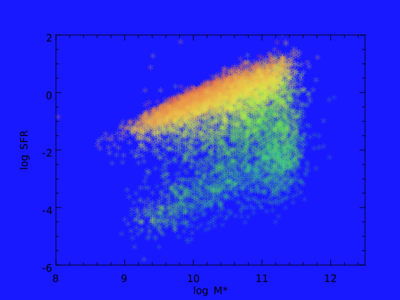

In [4]:
from wand.image import Image as WImage
img = WImage(filename="plplot_MaNGA1.pdf")
img.resize(400,300)
img